# Table of Contents

- Table of Contents

- First look at the dataset

- EDA

   - Checking for Missing Values
   
   - Basic Statistical Details
  
   - Correlation Heatmap
      - Highly correlated pairs
      - Inverse correlated pairs
      - Low correlated pairs
      
           
       
- Data Visualization

    - Feature Pairs
    - Scatter Plot
    - Count Plot
    - Histogram 
    
    
    
- Pre-Modeling Tasks

   - Separating the independant and the dependant variable
   - Splitting the dataset 
   - Feature Scaling
   
   
   
- Modeling

   - Random Forest Classifier
   - Suport Vector Machine
   
   
- Evaluation and comparision of all the models

  - Classification Accuracy

  - Confusion matrix

  - Precision

  - Recall

  - classification_report

  - ROC AUC Score

  - Area under curve (AUC)



- Optimizing SVM with Parameters Using GridSearchCV


  
- Optimizing Random Forest Classifier with Parameters Using GridSearchCV
 
   
    
- Resources

# Loading the libraries and the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Pre-Modeling Tasks

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Evaluation and comparision of all the models


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve

In [2]:
df = pd.read_csv("/Users/macuser/Documents/CSULB/Pattern Recognition/FinalProject/breast-cancer-wisconsin.data", 
                       names = ["id",  "Clump Thickness", "Uniformity of Cell Size","Uniformity of Cell Shape", 
                                  "Marginal Adhesion", "Single Epithelial Cell Size","Bare Nuclei", "Bland Chromatin",
                                  "Normal Nucleoli", "Mitoses", "Class"])

# Look at the dataset

Attribute Information:

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

How many Benign and Malignant do we have in our dataset?

In [3]:
df['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

As we can see, we have 239 - Malignant, and 444 - Benign

In [4]:
df.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.columns

Index(['id', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [6]:
df.shape

(683, 11)

# Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
id                             683 non-null int64
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null int64
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(11)
memory usage: 58.8 KB


## Basic Statistical Details

In [8]:
# describing the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,683.0,1.076720e+06,620644.047655,63375.0,877617.0,1171795.0,1238705.0,13454352.0
Clump Thickness,683.0,4.442167e+00,2.820761,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,683.0,3.150805e+00,3.065145,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,683.0,3.215227e+00,2.988581,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,683.0,2.830161e+00,2.864562,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,683.0,3.234261e+00,2.223085,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,683.0,3.544656e+00,3.643857,1.0,1.0,1.0,6.0,10.0
Bland Chromatin,683.0,3.445095e+00,2.449697,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,683.0,2.869693e+00,3.052666,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.603221e+00,1.732674,1.0,1.0,1.0,1.0,10.0


## Checking for missing values

Machine Learning algorithm generally, cannot work with missing values, so before we launch a machine learning algorithm we must cleaning the dataset, we will remove the features that doesn't affect the model 

In [9]:
#Check for any missing value
df.isnull().sum()
df.isna().sum()

id                             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [10]:
# Deleting the id and Unnamed column

df= df.drop(['id'],axis=1)

## Checking for the correlation


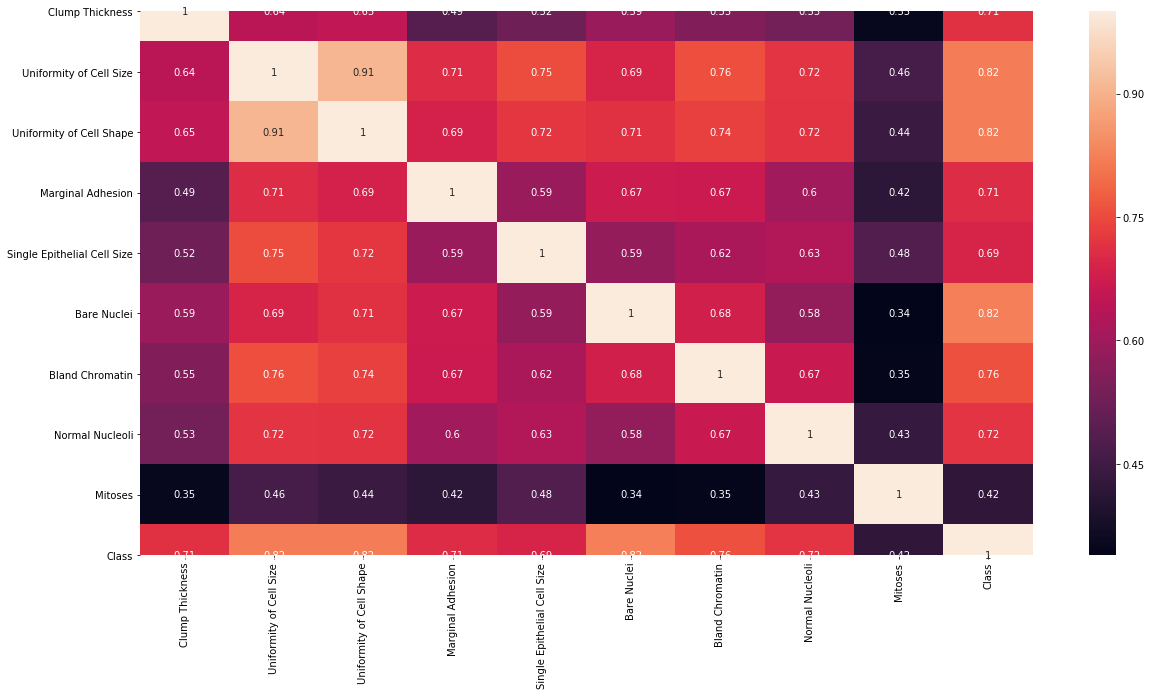

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.ioff()

### Highly correlated pairs

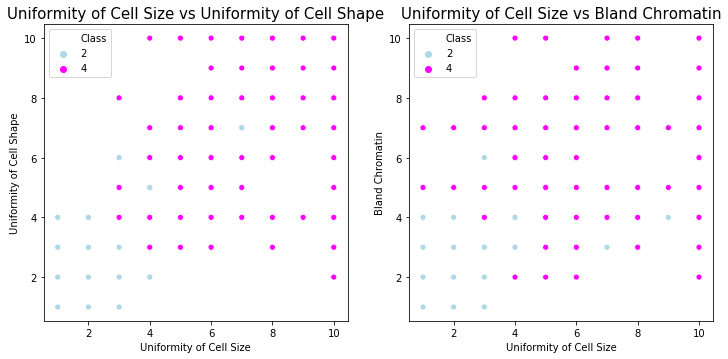

In [12]:

palette ={2 : 'lightblue', 4 : 'magenta'}


fig = plt.figure(figsize=(12,12))
def plot_scatter(a,b,k):
    plt.subplot(k)
    sns.scatterplot(x = df[a], y = df[b], hue = "Class",
                    data = df, palette = palette)
    plt.title(a + ' vs ' + b,fontsize=15)
    
plot_scatter('Uniformity of Cell Size','Uniformity of Cell Shape',221) 
plot_scatter('Uniformity of Cell Size','Bland Chromatin',222) 

### There are no Inverse correlated pairs

### Low correlated pairs

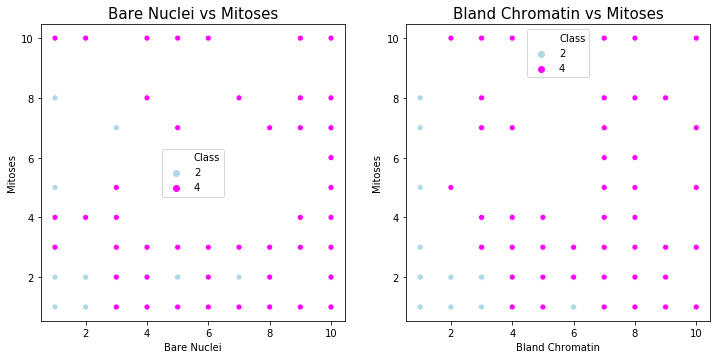

In [13]:
fig = plt.figure(figsize=(12,12))
plot_scatter('Bare Nuclei','Mitoses',223)
plot_scatter('Bland Chromatin','Mitoses',224)

# Data Visualization

## PairPlot

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


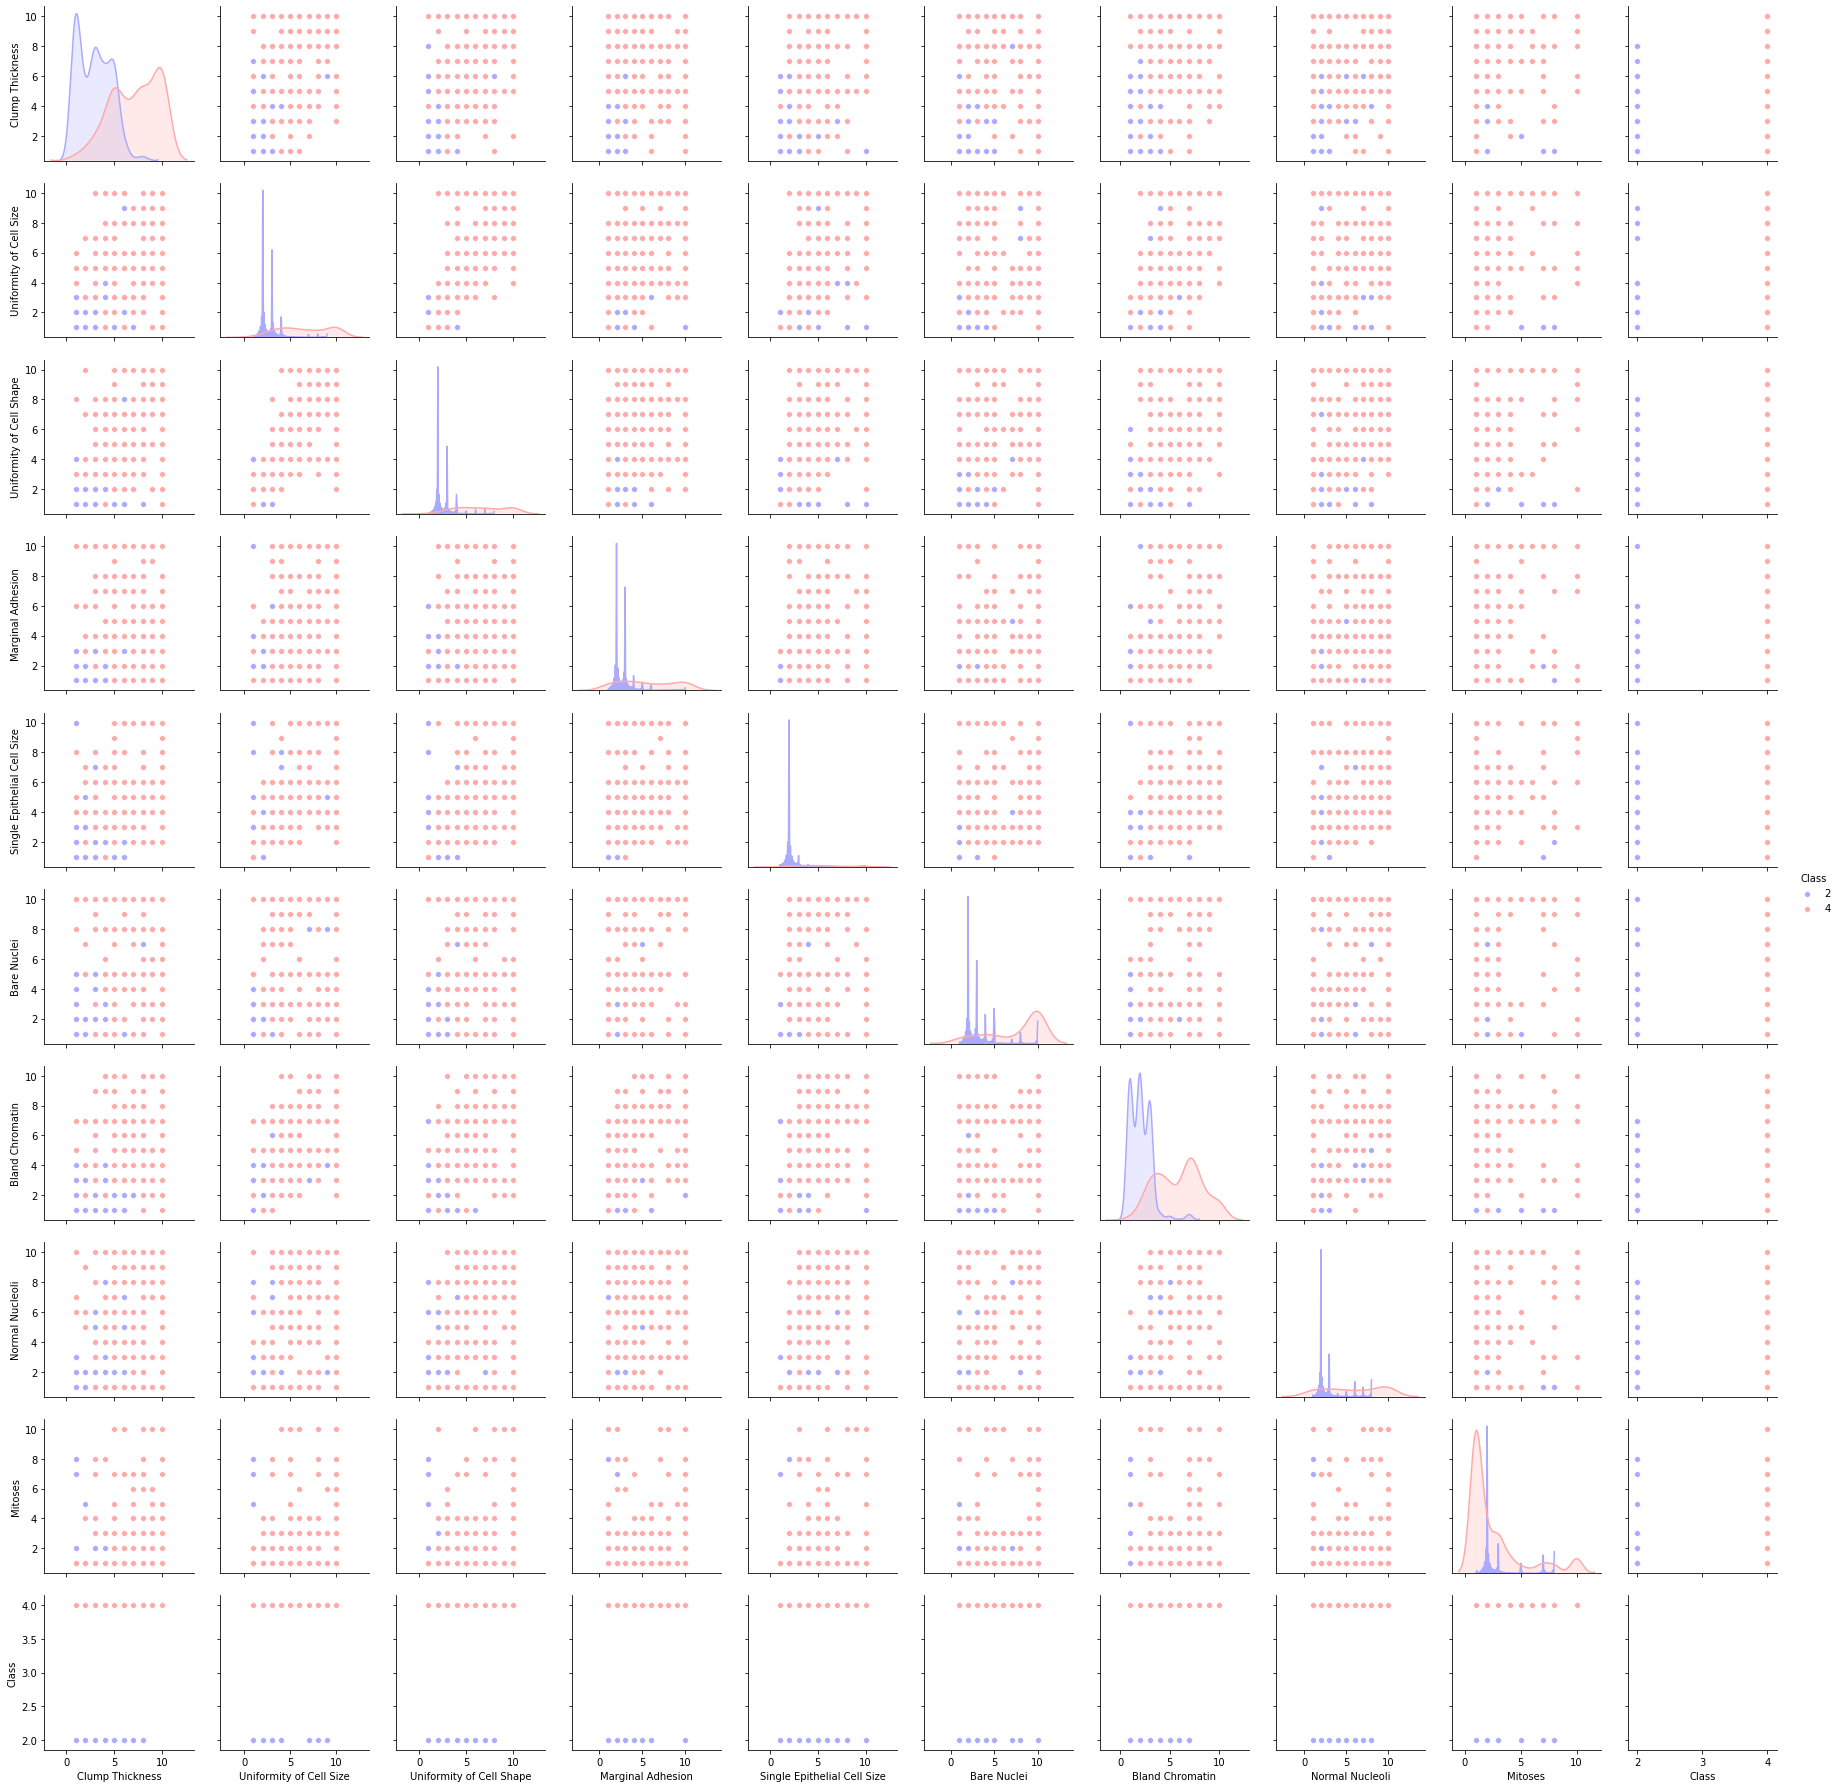

In [14]:
from pylab import rcParams

rcParams['figure.figsize'] = 8,5

cols = ["Clump Thickness", "Uniformity of Cell Size","Uniformity of Cell Shape", 
                                  "Marginal Adhesion", "Single Epithelial Cell Size","Bare Nuclei", "Bland Chromatin",
                                  "Normal Nucleoli", "Mitoses","Class"]

sns_plot = sns.pairplot(data=df[cols],hue='Class', palette='bwr')

## Count Plot


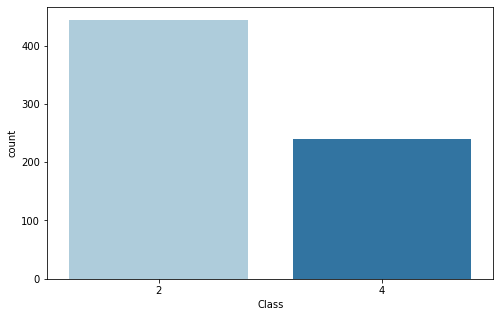

In [15]:
# Target variable

sns.countplot(df['Class'],palette='Paired')

## Histgram


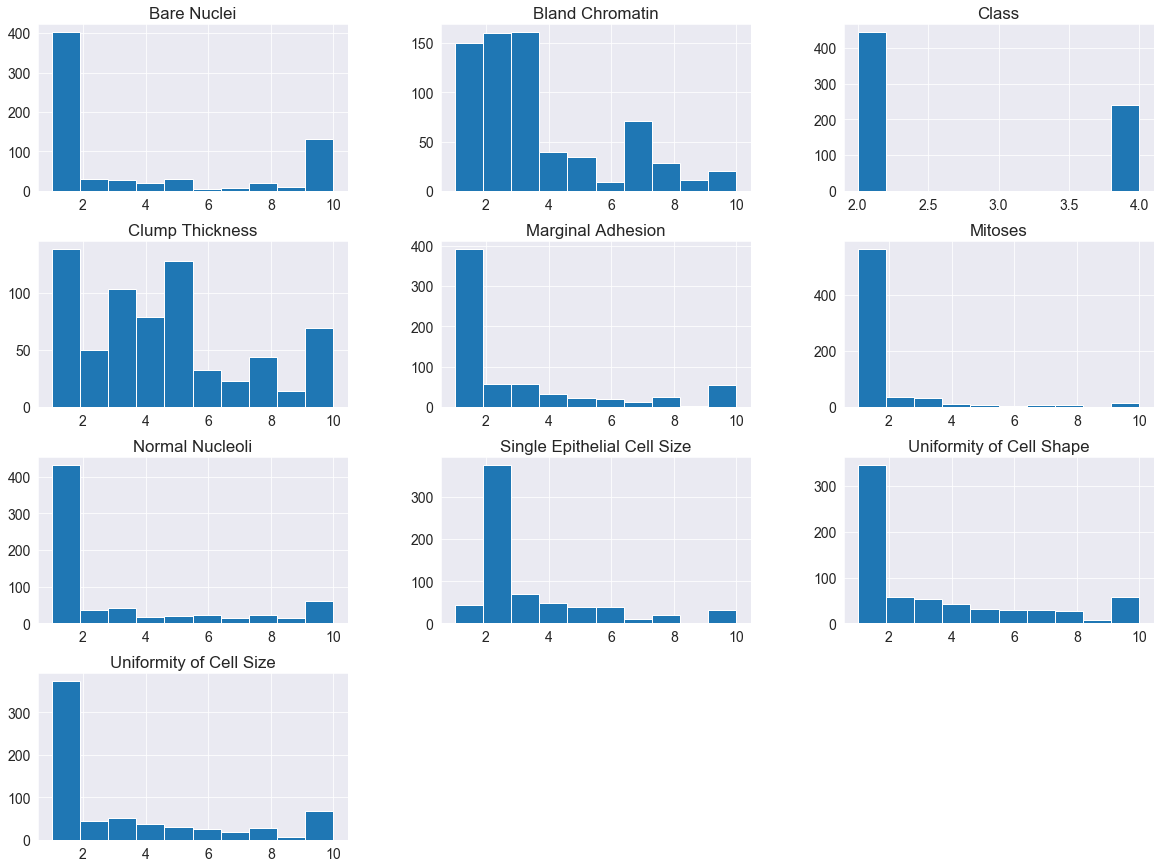

In [16]:
import matplotlib
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

df.hist(figsize = (20,15));

# Encoding categorical data

As we know machine learning algorithms can only read numerical values. It is essential to encoding categorical features into numerical values.

In [17]:
# Label Encoder

LEncoder = LabelEncoder()

df['Class'] = LEncoder.fit_transform(df['Class'])

df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


So we have encoded malignant as 1 and benign as 0

# Pre-Modeling Tasks


## Separating the independant and the dependant variable


In [18]:
X = df.drop('Class',axis=1).values
y = df['Class'].values

## Splitting the dataset


In Machine learning we must split the dataset into training and testing data:

 - the training set called also learning set that we will use to train our model, it has the big part.

 - the testing set: is used to evaluate the performance of the model after hypermarameter tuning, It's also useful to get an idea of how different models (SVMs, Neural Networks,    Random forests...) perform against each other.

- So creating the test set is easy, we just select a few rondom rows, in general we give it 10%  or 20%.

- SKit_Learn provides a function of splitting the dataset into multiples subsets. 


- train_test_split(), is the simplest way wich the same as the function: split_train_test(), the method accepts lists, numpy arrays, scipy sparse matrices or pandas dataframes.

  We will also identify some parameters, like the random_state that allows you to set the random generator seed.

- The ideal split is said to be 80:20 for training and testing. You may need to adjust it depending on the size of the dataset and parameter complexity.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

# Feature Scaling


Feature scaling is a method used to standardize the range of independent variables or features of data. Scaling the data is very important to boost the score.

Feature Scaling, is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range.

There are two ways for scaling the dataset:

-Standardization

-Min_Max Scaling

Standardization : it substract the mean value( so standardized values always have a zero mean), and then it divides by the standard deviation, this method doesn't have a specific range from 0 to 1, that may cause a problem for many algorithms like Neural Network often expect an input value ranging from 0 to 1.

Sckit-Learn provides a transformer caller StandardScaler. The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

Min_Max : called also Normalization, is the simplest way to scaling data, values are shifted and rescaled again so that the end up ranging from 0 to 1. we do this by substraction the min value and dividing by the Max minus the Min.

Sckit-learn provides a transformer callec MinMaxScaler. It have a hyperparameter called "Feature Range" to specify the range that you want.

In [20]:
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)

# Modeling

- In this part we'll try different models of Machine learning: Random Forest Classifier and Support Vector Machine

In [21]:

# Random Forest Classifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)





# Support Vector classifier

#svc = SVC(probability=True)

#svc.fit(X_train,y_train)

#y_pred_svc = svc.predict(X_test)


# Support Vector classifier

svc_linear = SVC(kernel='linear',probability=True)

svc_linear.fit(X_train,y_train)

y_pred_svc_linear = svc_linear.predict(X_test)


# Support Vector classifier

svc_rbf = SVC(kernel='rbf',probability=True)

svc_rbf.fit(X_train,y_train)

y_pred_svc_rbf = svc_rbf.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((478, 9), (478,), (205, 9), (205,))

# Evaluation and comparison of all the models

In [23]:
models = []

Z = [SVC(kernel='linear'), SVC(kernel='rbf'), RandomForestClassifier()]


X = ["SVC-Linear", "SVC-RBF", "RandomForestClassifier"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    models.append(accuracy_score(pred , y_test))   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
d = { "Accuracy" : models , "Algorithm" : X }
data_frame = pd.DataFrame(d)
data_frame

,Accuracy,Algorithm
0,0.965854,SVC-Linear
1,0.960976,SVC-RBF
2,0.960976,RandomForestClassifier


Text(0.5, 1.0, 'Accuracy of all Algorithms')

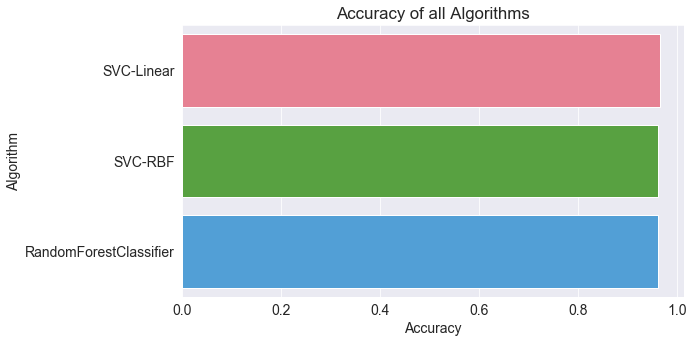

In [25]:
sns.barplot(data_frame['Accuracy'],data_frame['Algorithm'],palette= "husl").set_title('Accuracy of all Algorithms')

As we see, from the above table and graph, that SVC-Linear work best for this dataset

# Evaluating The Performance of the model

Evaluating the machine learning model is a crucial part in any data science project. There are many metrics that helps us to evaluate our model accuracy.

- Classification Accuracy

- Confusion matrix

- Precision

- Recall

- classification_report

- ROC AUC Score

- Area under curve (AUC)

Now, let's see the performance metrics of SVC-Linear, SVC-RBF and Random Forest classifiers

## Confusion Matrix


- A confusion matrix is a table that can be used to measure the performance of an machine learning algorithm, usually a supervised learning one. Each row of the confusion matrix represents the instances of an actual class and each column represents the instances of a predicted class


In a binary classifier, the "**true**" class is typically labeled with 1 and the "**false**" class is labeled with 0.

  - True Positive: A positive class observation (1) is correctly classified as positive by the model.

  - False Positive: A negative class observation (0) is incorrectly classified as positive.

  - True Negative: A negative class observation is correctly classified as negative.

  - False Negative: A positive class observation is incorrectly classified as negative.

Let’s visualize the confusion matrix, to see how accurate are the results we obtained.

# SVC-Linear

In [26]:
cm = np.array(confusion_matrix(y_test, y_pred_svc_linear, labels=[1,0]))

confusion_mat= pd.DataFrame(cm, index = ['cancer', 'healthy'],
                           columns =['predicted_cancer','predicted_healthy'])

confusion_mat

,predicted_cancer,predicted_healthy
cancer,74,3
healthy,4,124


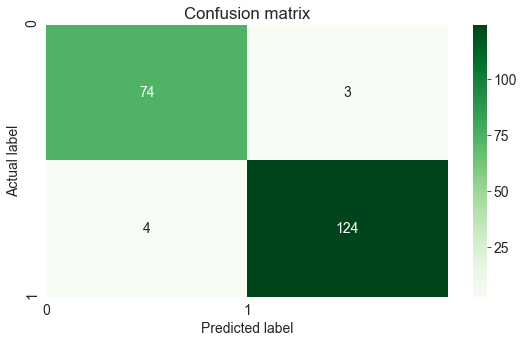

In [27]:
sns.heatmap(cm,annot=True,fmt='g',cmap='Greens')
plt.xticks([0,1],labels=[0,1])
plt.yticks([-0.0,2],labels=[0,1])
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label');

# Random Forest

In [28]:
cm = np.array(confusion_matrix(y_test, y_pred_rf, labels=[1,0]))

confusion_mat= pd.DataFrame(cm, index = ['cancer', 'healthy'],
                           columns =['predicted_cancer','predicted_healthy'])

confusion_mat

,predicted_cancer,predicted_healthy
cancer,75,2
healthy,3,125


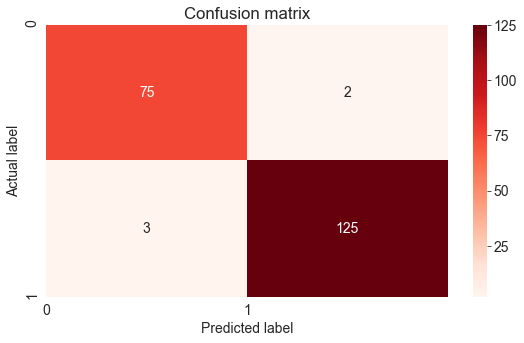

In [29]:
sns.heatmap(cm,annot=True,fmt='g',cmap='Reds')
plt.xticks([0,1],labels=[0,1])
plt.yticks([-0.0,2],labels=[0,1])
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label');

# SVC-RBF

In [30]:
cm = np.array(confusion_matrix(y_test, y_pred_svc_rbf, labels=[1,0]))

confusion_mat= pd.DataFrame(cm, index = ['cancer', 'healthy'],
                           columns =['predicted_cancer','predicted_healthy'])

confusion_mat

,predicted_cancer,predicted_healthy
cancer,75,2
healthy,6,122


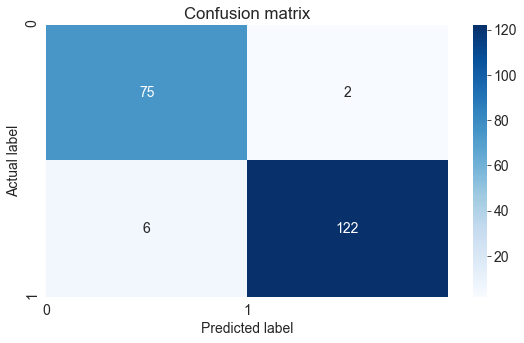

In [31]:
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues')
plt.xticks([0,1],labels=[0,1])
plt.yticks([-0.0,2],labels=[0,1])
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label');

- As we can see from the table above:

   - **True Positive(TP)** : Values that the model predicted as yes(Healthy), and is actually yes(Healthy).
   - **True Negative(TN)** : Values that the model predicted as not(Cancer), and is actually no(Cancer).
   - **False Positive(FP)**: Values that the model predicted as yes(Healthy), but actually no(Cancer).
   - **False Negative(FN)**: Values that the model predicted as no (Cancer), but actually yes(Healthy).

For this dataset, whenever the model is predicting something as yes, it indicates Absence of cancer cells (Healthy) and for cases when the model predicting no; it indicates existence of cancer cells(Cancer).


## Accuracy_Score


- **Accuracy_Score** is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations


(TP + TN)/total

In [32]:
print("Test Accuracy for SVC-Linear:", accuracy_score(y_test, y_pred_svc_linear))
print("Test Accuracy for SVC-RBF:", accuracy_score(y_test, y_pred_svc_rbf))
print("Test Accuracy for Random Forest Classifier:", accuracy_score(y_test, y_pred_rf))

Test Accuracy for SVC-Linear: 0.9658536585365853
Test Accuracy for SVC-RBF: 0.9609756097560975
Test Accuracy for Random Forest Classifier: 0.975609756097561


## Precision 

- **Precision** is the ratio of correctly predicted positive observations to the total predicted positive observations.

In [33]:
print("Precision for SVC-Linear:",precision_score(y_test, y_pred_svc_linear))
print("Precision for SVC-RBF:",precision_score(y_test, y_pred_svc_rbf))
print("Precision for Random Forest Classifier:",precision_score(y_test, y_pred_rf))

Precision for SVC-Linear: 0.9487179487179487
Precision for SVC-RBF: 0.9259259259259259
Precision for Random Forest Classifier: 0.9615384615384616


## Recall

- **Recall** also called Sensitivity, is the ratio of positive instances that are correctly detected by the classifier to the all observations in actual class

In [34]:
print("Recall for SVC-Linear:",recall_score(y_test, y_pred_svc_linear))
print("Recall for SVC-RBF:",recall_score(y_test, y_pred_svc_rbf))
print("Recall for Random Forest Classifier:",recall_score(y_test, y_pred_rf))

Recall for SVC-Linear: 0.961038961038961
Recall for SVC-RBF: 0.974025974025974
Recall for Random Forest Classifier: 0.974025974025974


## Classification Report


In [35]:
print("Classification Report for SVC-Linear:\n",classification_report(y_test, y_pred_svc_linear))
print("Classification Report for SVC-RBF:\n",classification_report(y_test, y_pred_svc_rbf))
print("Classification Report for Random Forest Classifier:\n",classification_report(y_test, y_pred_rf))


Classification Report for SVC-Linear:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       128
           1       0.95      0.96      0.95        77

    accuracy                           0.97       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205

Classification Report for SVC-RBF:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       128
           1       0.93      0.97      0.95        77

    accuracy                           0.96       205
   macro avg       0.95      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205

Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       128
           1       0.96      0.97      0.97        77

    accuracy                           0.98       205


True Positive Rate/Recall/Sensitivity: How often the model predicts yes(Healthy) when it's actually yes(Healthy)?

True Positive Rate(TPR) = TP/TP+FP
False Positive Rate: How often the model predicts yes(Healthy) when it's actually no(Cancer)?

False Positive Rate(FPR) = FP/FP+TN

## The ROC Curve

0.9956371753246753


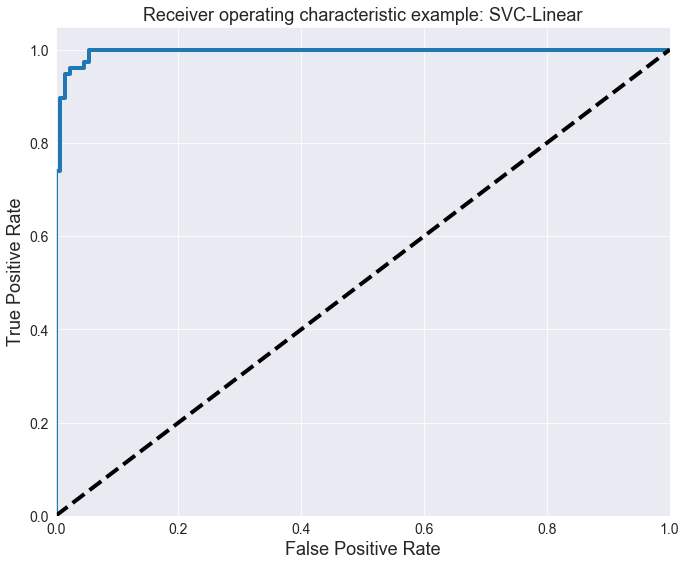

In [36]:

#plt.style.use('seaborn-pastel')

y_score = svc_linear.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('Receiver operating characteristic example: SVC-Linear', fontsize= 18)
plt.show()

0.9910714285714286


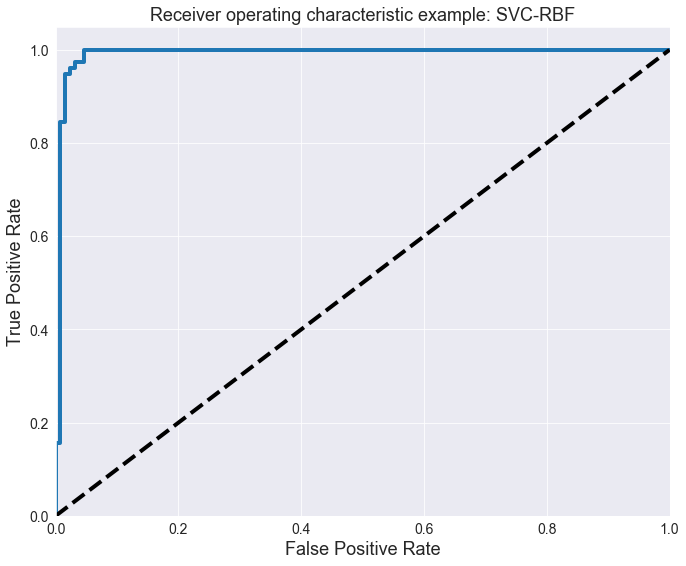

In [37]:
#plt.style.use('seaborn-pastel')

y_score = svc_rbf.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('Receiver operating characteristic example: SVC-RBF', fontsize= 18)
plt.show()

- The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). As we notice the **SVC-linear** Classifier give a curve closer

  to the top-left corner so it indicate a better performance.

## Area Under Curve

Area Under Curve is a common way to compare classifiers. A perfect classifier will have ROC AUC equal to 1

Sckit-Learn provides a function to compute the ROC AUC.

In [38]:
roc_auc_score(y_test, y_score)

0.9910714285714286

# Optimizing The SVM Classifier with Parameters Using GridSearchCV

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.001], 'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose = 4)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.938, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.962, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.925, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.963, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.987, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.950, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [40]:
print('The Best parameters are %s with a score of %0.2f' % (grid.best_params_, grid.best_score_))

The Best parameters are {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'} with a score of 0.97


In [41]:
grid_score = grid.score(X_test, y_test)

print('\nThe grid accuracy score is', grid_score)


The grid accuracy score is 0.9707317073170731


# Optimizing Random Forest Classifier with Parameters Using GridSearchCV


In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    }

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose = 4, cv=5)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] max_depth=2, n_estimators=5 .....................................
[CV] ......... max_depth=2, n_estimators=5, score=0.948, total=   0.0s
[CV] max_depth=2, n_estimators=5 .....................................
[CV] ......... max_depth=2, n_estimators=5, score=0.917, total=   0.0s
[CV] max_depth=2, n_estimators=5 .....................................
[CV] ......... max_depth=2, n_estimators=5, score=0.989, total=   0.0s
[CV] max_depth=2, n_estimators=5 .....................................
[CV] ......... max_depth=2, n_estimators=5, score=0.979, total=   0.0s
[CV] max_depth=2, n_estimators=5 .....................................
[CV] ......... max_depth=2, n_estimators=5, score=0.937, total=   0.0s
[CV] max_depth=2, n_estimators=10 ....................................
[CV] ........ max_depth=2, n_estimators=10, score=0.979, total=   0.0s
[CV] max_depth=2, n_estimators=10 ....................................
[CV] ........ m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ........ max_depth=2, n_estimators=50, score=0.969, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.979, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.979, total=   0.1s
[CV] max_depth=2, n_estimators=50 ....................................
[CV] ........ max_depth=2, n_estimators=50, score=0.958, total=   0.1s
[CV] max_depth=2, n_estimators=100 ...................................
[CV] ....... max_depth=2, n_estimators=100, score=0.969, total=   0.1s
[CV] max_depth=2, n_estimators=100 ...................................
[CV] ....... max_depth=2, n_estimators=100, score=0.948, total=   0.1s
[CV] max_depth=2, n_estimators=100 ...................................
[CV] ....... max_depth=2, n_estimators=100, score=0.979, total=   0.1s
[CV] max_depth=2, n_estimators=100 ...................................
[CV] .

[CV] ....... max_depth=8, n_estimators=250, score=0.969, total=   0.3s
[CV] max_depth=8, n_estimators=250 ...................................
[CV] ....... max_depth=8, n_estimators=250, score=0.958, total=   0.3s
[CV] max_depth=8, n_estimators=250 ...................................
[CV] ....... max_depth=8, n_estimators=250, score=0.989, total=   0.3s
[CV] max_depth=8, n_estimators=250 ...................................
[CV] ....... max_depth=8, n_estimators=250, score=0.989, total=   0.3s
[CV] max_depth=8, n_estimators=250 ...................................
[CV] ....... max_depth=8, n_estimators=250, score=0.958, total=   0.3s
[CV] max_depth=16, n_estimators=5 ....................................
[CV] ........ max_depth=16, n_estimators=5, score=0.979, total=   0.0s
[CV] max_depth=16, n_estimators=5 ....................................
[CV] ........ max_depth=16, n_estimators=5, score=0.948, total=   0.0s
[CV] max_depth=16, n_estimators=5 ....................................
[CV] .

[CV] ..... max_depth=None, n_estimators=50, score=0.958, total=   0.1s
[CV] max_depth=None, n_estimators=50 .................................
[CV] ..... max_depth=None, n_estimators=50, score=0.989, total=   0.1s
[CV] max_depth=None, n_estimators=50 .................................
[CV] ..... max_depth=None, n_estimators=50, score=0.989, total=   0.1s
[CV] max_depth=None, n_estimators=50 .................................
[CV] ..... max_depth=None, n_estimators=50, score=0.947, total=   0.1s
[CV] max_depth=None, n_estimators=100 ................................
[CV] .... max_depth=None, n_estimators=100, score=0.969, total=   0.1s
[CV] max_depth=None, n_estimators=100 ................................
[CV] .... max_depth=None, n_estimators=100, score=0.969, total=   0.1s
[CV] max_depth=None, n_estimators=100 ................................
[CV] .... max_depth=None, n_estimators=100, score=0.989, total=   0.1s
[CV] max_depth=None, n_estimators=100 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   16.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [43]:
print('The Best parameters are %s with a score of %0.2f' % (grid.best_params_, grid.best_score_))

The Best parameters are {'max_depth': 4, 'n_estimators': 250} with a score of 0.97


In [44]:
grid_score = grid.score(X_test, y_test)

print('\nThe grid accuracy score is', grid_score)


The grid accuracy score is 0.9804878048780488


# References

- [Understanding a Classification Report For Your Machine Learning Model](https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397)

- [True Positive Rate](https://www.sciencedirect.com/topics/computer-science/true-positive-rate)

- [How to plot an ROC curve in Python](https://www.kite.com/python/answers/how-to-plot-an-roc-curve-in-python)